<a href="https://colab.research.google.com/github/ahmedfathi1/Sales-Repository/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ahmed Fathi

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTUrdBxxbXdpamsmQrDzmyfKrTn4-NEZWyssJj7xwxNcY3kk-mqCAoD_ZyUPJRO53G8j_aG8cfCP7AV/pub?output=csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

In [5]:
# Finding how many rows and columns there are
df.shape

(8523, 12)

In [6]:
# What are the data types of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Checking to see if there are duplicates
df.duplicated().sum()


0

In [8]:
# Checking to see if there are any missing values
df.isna().sum()

# Decided to drop the two columns because they have unique values that are not known, and their information is not needed for sales data
df.drop(columns='Item_Weight', inplace=True)
df.drop(columns='Outlet_Size', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
# Looking for inconsistent categories of data
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [10]:
# Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)


In [11]:
# Used to check if the change took place and is correct
df['Item_Fat_Content'].value_counts()

Series([], Name: Item_Fat_Content, dtype: int64)

In [12]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


##Using a histogram to look at the number of products based on their Item Group

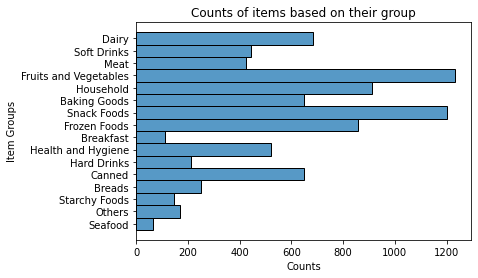

In [13]:
item_count = sns.histplot(data = df, y = 'Item_Type')
item_count.set(xlabel ="Counts", ylabel = "Item Groups", title ='Counts of items based on their group');

## Box plot used to look at the statistics of item sales based on the type of store

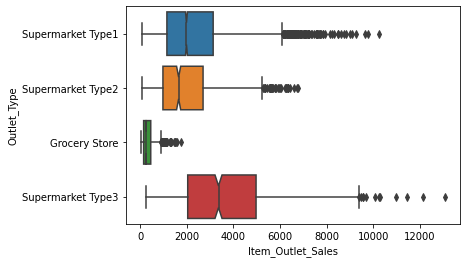

In [14]:
sns.boxplot(data=df, y='Outlet_Type', x='Item_Outlet_Sales', notch=True);

## Creating a correlation map to show if different columns in the data are closely related to each other or not at all.

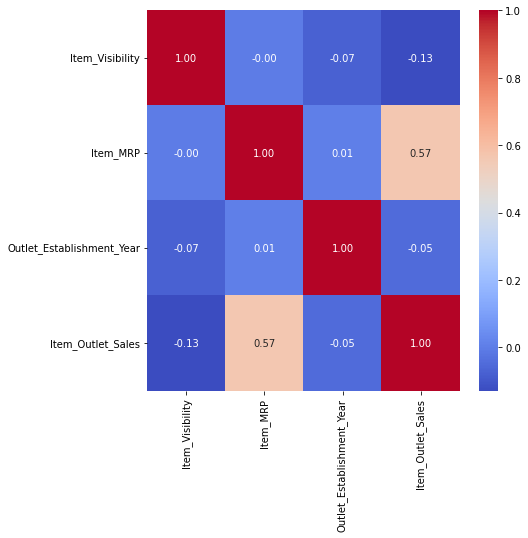

In [15]:
corr = df.drop(columns='Item_Identifier').corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

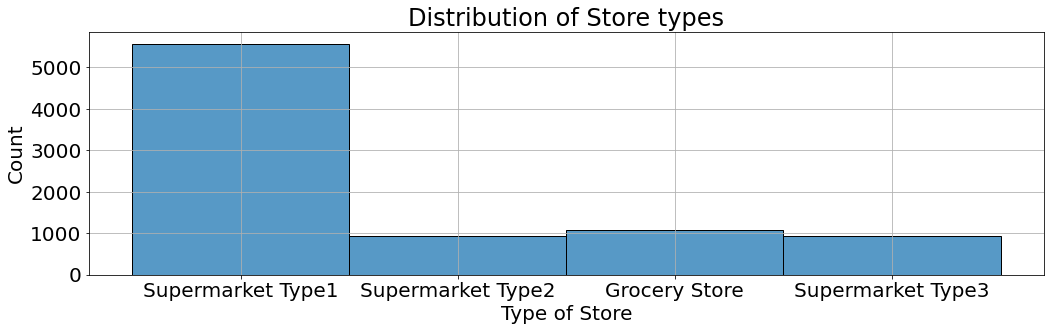

In [40]:
fig, ax = plt.subplots(figsize = (15,5))
default_params = plt.rcParams.copy();
plt.rcParams.update({'font.family':'DejaVu Sans',
                     'font.size':20});
plt.grid()

# creating histogram
sns.histplot(data = df, x = 'Outlet_Type', ax = ax)
ax.set(title = 'Distribution of Store types', xlabel = 'Type of Store');


### From the above graph we can see that a large majority of items sold in the data are found in Supermarket Type1.

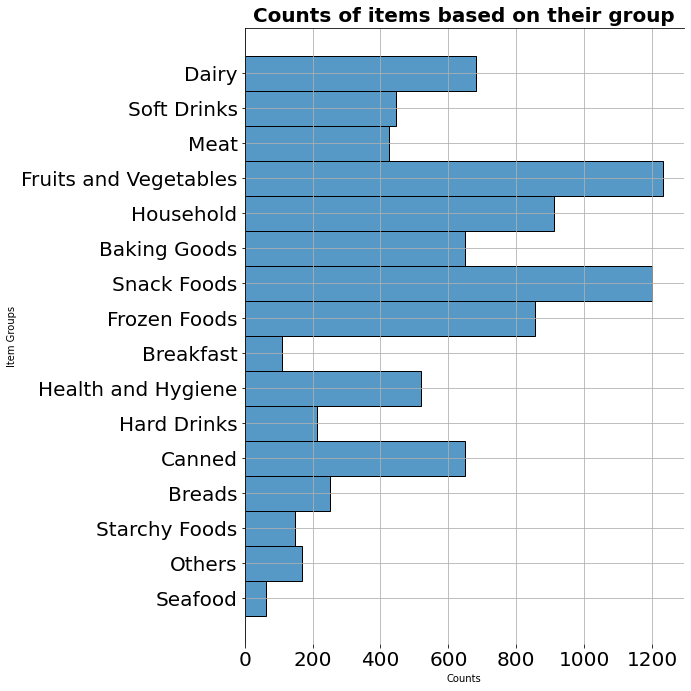

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
item_count = sns.histplot(data = df, y = 'Item_Type')
item_count.set_title('Counts of items based on their group', fontsize = 20, fontweight = 'bold')
item_count.set_xlabel('Counts', fontsize = 10)
item_count.set_ylabel("Item Groups", fontsize = 10)
item_count.spines['bottom'].set_visible(False)
item_count.spines['right'].set_visible(False)
plt.grid();
